# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


Linear Regression: Technique that finds the best line that fits a model by minimizing a cost function (MSE, RMSE). It can also be done by Gradient Descent. 

Polynomial Regression: A generalization of the technique presented above, where you try to find the best polynomial expression that fits a model (as long as the model is linear with respect to its parameter). 

**Overfitting vs Underfitting**

Overfitting happens when your model is too complex and stops learning the pattern in the data. For example, if you have 2000 data points and a polynomial expression of degree 1999, you will find the polynomial that passes through each point. In that case, you model performs very well on the training set and very bad on the test set. 

Underfitting occurs when your model is not complex enough to capture the main trends in the data. For example, if you have datapoints that can be fitted by an s shaped polynomial (degree 3) and your polynomial is of degree 1 (a line), you will be underfitting the model. 


### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

Logistic Regression model computes a weighted sum of input features plus a bias term and output the estimated probability obtained by the sigmoid function. If the output is above 0.5, then the model predicts it belongs to the class labeled "1". Otherwise, it is 0. 


SVMs are a machine learning model that are particularly well suited for classification of complex but small or medium datasets.
There are two types of Linear SVM classification: Hard margin classification and soft margin classification. 
(Large Margin Classification) Given a dataset, the models tries to find the line that not only separates the two classes but also stays as far away from the closest training instances as possible. These instances are called support vectors. We can think of SVMs as fitting the widest possible street between the classes. 
If we striclt impose that all instances be "off the street"m this is called hard margin classification.
Two issue arise with hard margin classfication: 1) The data must be linearly separable 2) It is quite sensitive to outliers.
To avoid these issues, there exists a more flexible version of SVM: the soft margin classification. In this model, in addition to determining the line that separates the two classes, the objective is to find a good balance betweenkeeping the street as large as possible and limiting the margin violations.
When you cannot solve the optimization problem for the given set of constraints, you can relax your constraints by introducing slack variables.
Kernel methods are a class of algorithms for pattern analysis. The general task of pattern analysis is to find and study general types of relations (for example clusters, rankings, principal components, correlations, classifications) in datasets. In its simplest form, the kernel trick means transforming data into another dimension that has a clear dividing margin between classes of data.

Linear SVM not enough to separate the data
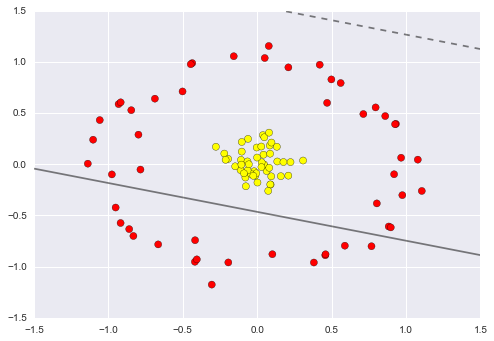





Kernel trick
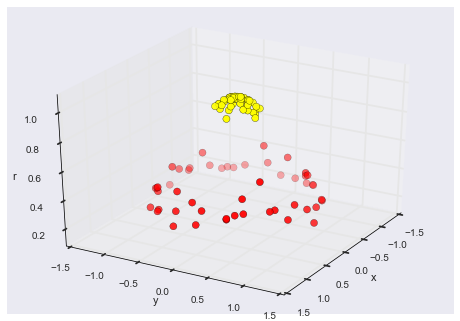

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

In supervised learning, the training set contains labels. In unsupervised learning, the dataset does not contain labels. 

k-NN is a  lazy learning algorithm because generalization of the training data is, in theory, delayed until a query is made to the system. The primary motivation is that the data set is continuously updated with new entries, which would render the training data to be obsolete in a relatively short time. The main advantage gained in employing a lazy learning method is that the target function will be approximated locally. Because the target function is approximated locally for each query to the system, lazy learning systems can simultaneously solve multiple problems and deal successfully with changes in the problem domain. An example of lazy learning algorithm is Lazy naive Bayes rules, which are extensively used in commercial spam detection software. In this case, the learning rules must also be continually updated to catch all new spamming strategies.

KNN algorithm: The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.
In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point.

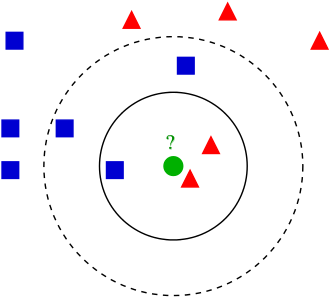

Example of k-NN classification. We want to classify the test sample corresponding to the green circle. Depending on the value of k, it will either be classified as blue square of red triangle. In particular, if k = 3 (solid line circle) it predicts it as red because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is predicted be a blue circle.



SVM yes, KNN no

SVM no, KNN yes

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [1]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
# y = iris.target
# x_iris.head()
iris_df.head()
y = iris.target
# print(y)
x_iris = iris_df.drop(["target"], axis = 1)
x_iris = x_iris.values
X_train, X_test, y_train, y_test = train_test_split(x_iris, y, test_size=0.33, random_state=42)

#calculate the distance for all features --> find euclidean distance
#storein 2D array (distance, point)
#sort the array
#get the k's first value and find the label
#the label with majority is assigned

In [2]:
def train(X_train, y_train):
    # do nothing 
    return

In [3]:
def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [4]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
        
    # train on the input data
    train(X_train, y_train)

    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

In [5]:
# making our predictions 
predictions = []
try:
    kNearestNeighbor(X_train, y_train, X_test, predictions, 10)
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
    print('Can\'t have more neighbors than training samples!!')


The accuracy of OUR classifier is 98%


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

Context: Need to get a diverse set of classifiers because ensemble methods work best when the predictors are independent from one another as possible. In this case, predictors will not be doing the same "errors" and the accuracy of the ensemble method increases. One way to achieve this is to use very different training algorithms for each predictor.
Bagging: Another approach to achieve this where you use the same training algorithm for predictor but train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging.

Boosting: Boosting refers to any Ensemble method that can combine several week learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

A random forest is an ensemble of decision trees that are generally trained with the baggin method. A decision tree is a machine learning method where the goal is to create a model that predicts the value of a target variable based on several input variables. It is composed of leafs and attibutes. Each leaf is an output value and each attribute is a test that determines which path to follow.

Pros & Cons

Decision Tree: (pros) understandable by human, compact and fast (once learned)/ (cons) prone to overfitting, axis-aligned splits of data.

Random Forest: (pros) very accurate, works well on large dataset, doesn't require feature engineering /(cons) results are diffiult to interpret, hyperparameters need good tuning for high accuracy.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

PCA achieves dimensionality reduction by identifying the hyperplane for which the projection of the data on it will preserve maximum variance. It then projects the data onto it. 
The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.
For PCA to work properly, you have to subtract the mean from each of the data dimensions to produce a data set whose mean is zero.
PCA is restricted to a linear map, while auto encoders can have nonlinear enoder/decoders.
A single layer auto encoder with linear transfer function is nearly equivalent to PCA.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [6]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people
from time import time
import logging
import pylab as plt
import numpy as np

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Extracting the top 250 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis


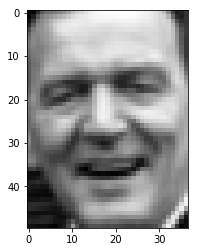

In [9]:
# plot an example image
plt.imshow(X[7].reshape(h,w), cmap = 'gray')

### insert your code here ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 250

# was set to varying values in this lesson, comparing F1 score

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [8]:
### your code below ###

